In [ ]:
#########################
#  Carregando os Dados  #
#########################

import pandas as pd
from models.titulo import Titulo
from models.investidor import Investidor, PerfilInvestidor
from models.relatorio_investimento import RelatorioInvestimento


df = pd.read_csv(r'C:\mq3_trabalho\data\tesouro_direto_titulos.csv') 
df['Rentabilidade anual'] = df['Rentabilidade anual'].astype(float)

# Cria uma lista de objetos 'Titulo' a partir do DataFrame
titulos = [
    Titulo(
        nome=row['Título'],
        vencimento=row['Vencimento'],
        taxa_juros_anual=row['Rentabilidade anual'] / 100
    )
    for _, row in df.iterrows()
]

In [2]:
df_ipca = pd.read_csv(r'C:\mq3_trabalho\data\historico_ipca.csv', sep=';')
df_ipca['aumento_ipca'] = df_ipca['aumento_ipca'].astype(float) 
df_ipca['aumento_ipca'] = df_ipca['aumento_ipca']/100

In [3]:
##############################################
#CÉLULA 2: DEFINIÇÃO DAS PREMISSAS DO CLIENTE#
##############################################


cliente_perfil = {
    'idade': 20,
    'idade_aposentadoria': 70,
    'renda_atual': 3000,
    'expectativa_vida': 80,
    'renda_desejada': 10000,
    'perfil': PerfilInvestidor.MODERADO, # 15% do salário
    'aumento_salario': 0 # Inicialmente pensou em se usar essa variável.
}

# Instancia o objeto do cliente
# O 'titulo' aqui é apenas um placeholder, já que as simulações pedem o título como argumento.
cliente = Investidor(**cliente_perfil, titulo=titulos[0])

print("Perfil do cliente definido:")
print(cliente_perfil)


Perfil do cliente definido:
{'idade': 20, 'idade_aposentadoria': 70, 'renda_atual': 3000, 'expectativa_vida': 80, 'renda_desejada': 10000, 'perfil': <PerfilInvestidor.MODERADO: 0.15>, 'aumento_salario': 0}


\n--- Gerando Gráfico 1: Comparativo de Títulos (['Tesouro Prefixado 2032', 'Tesouro IPCA+ 2040', 'Tesouro Renda+ Aposentadoria Extra 2030']) ---


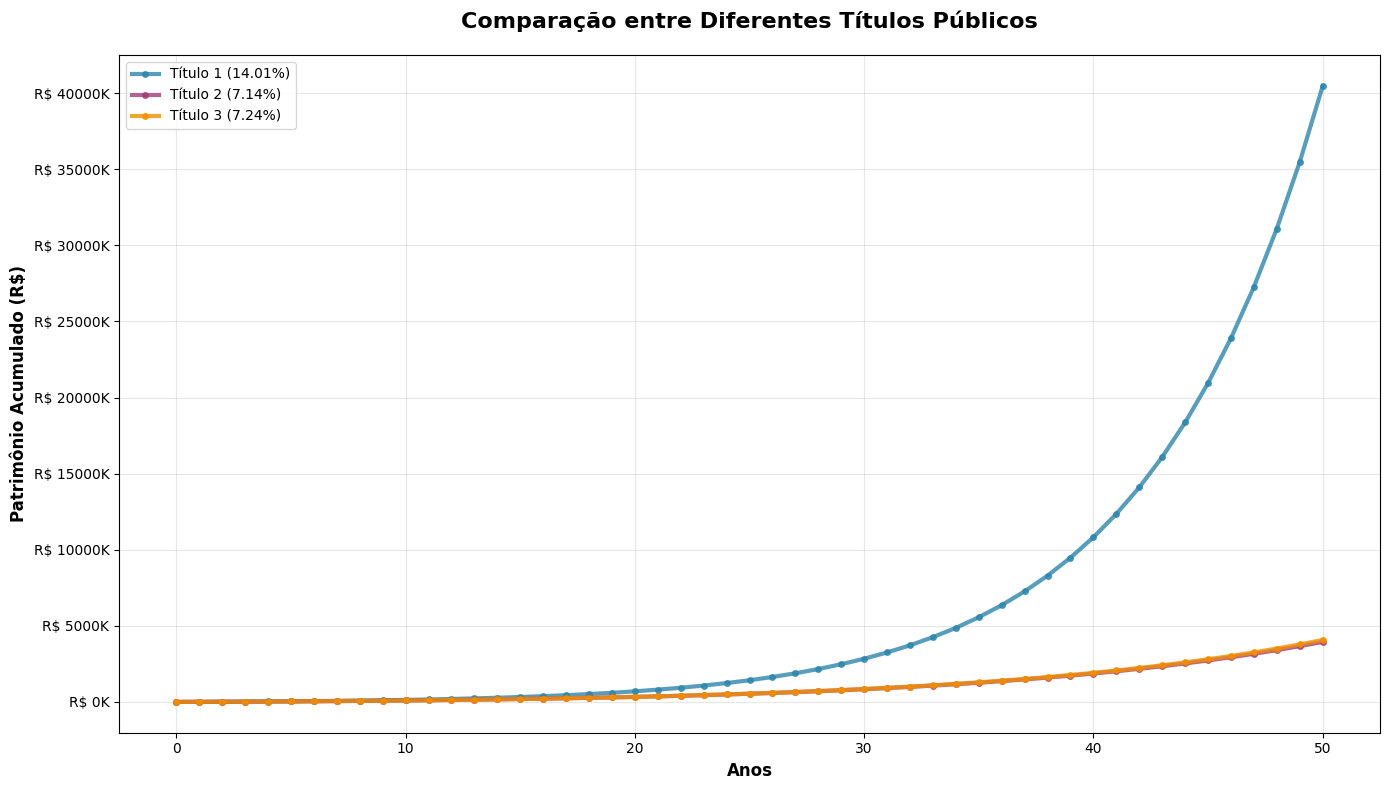

\n--- Gerando Análises para o Título Recomendado: Tesouro Renda+ Aposentadoria Extra 2065 ---
Gerando Gráfico 2: Evolução do Patrimônio...


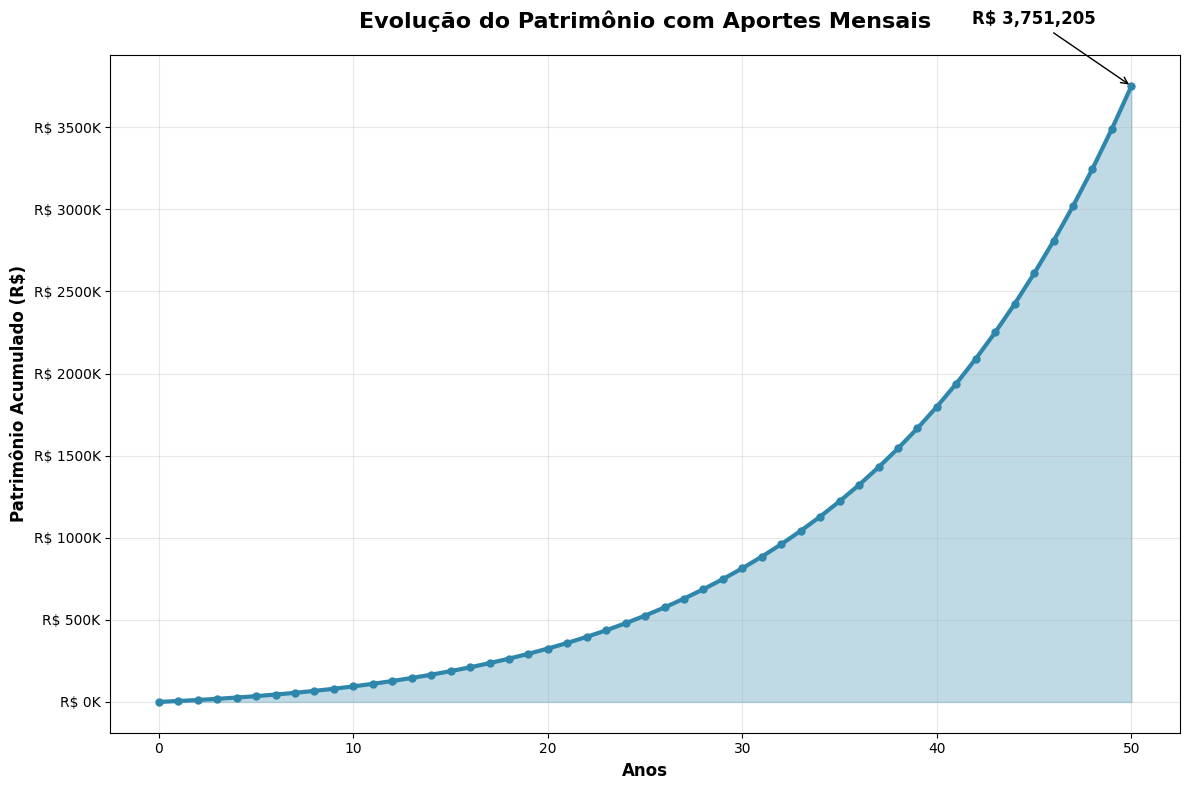

Gerando Gráfico 3: Evolução dos Aportes Mensais...


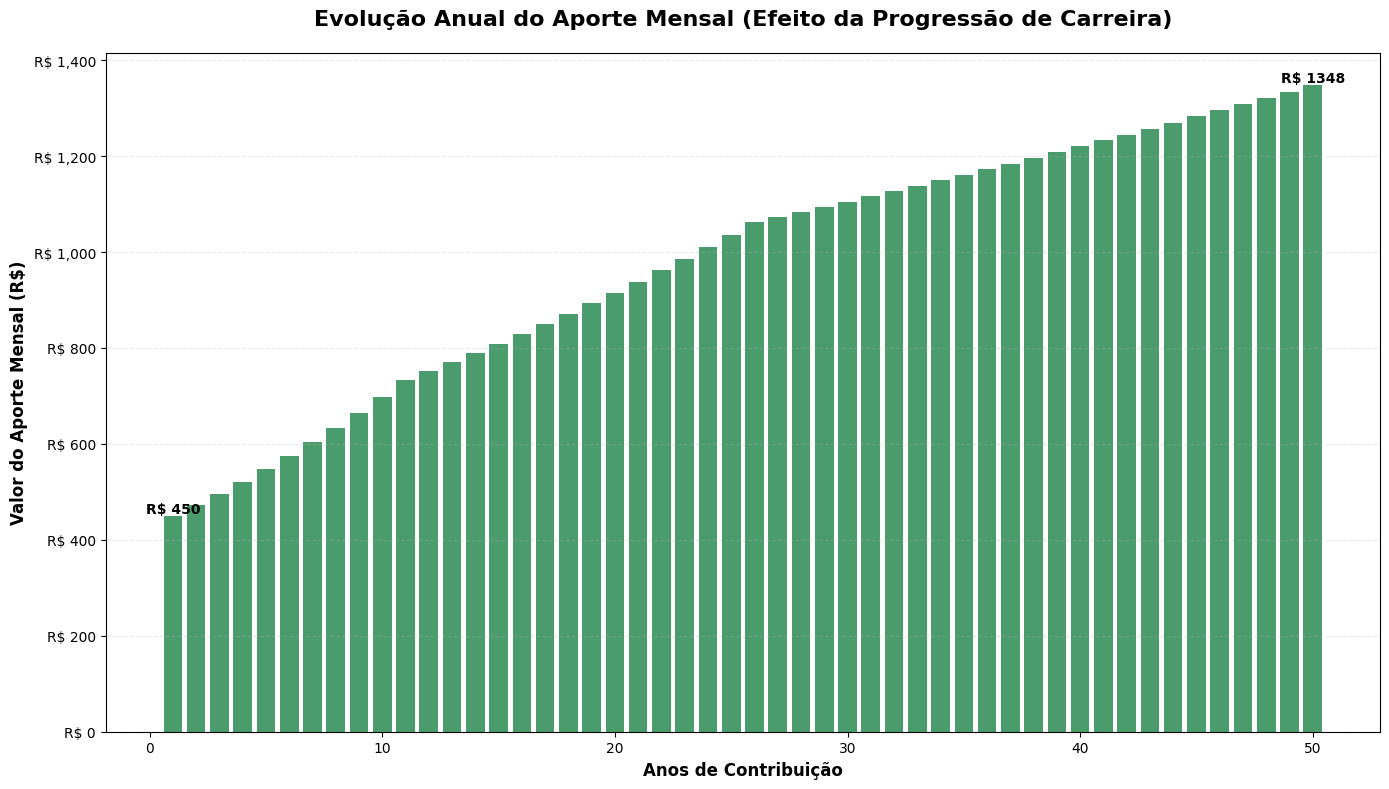

Gerando Gráfico 4: Aporte Único Equivalente vs. Aportes Mensais...


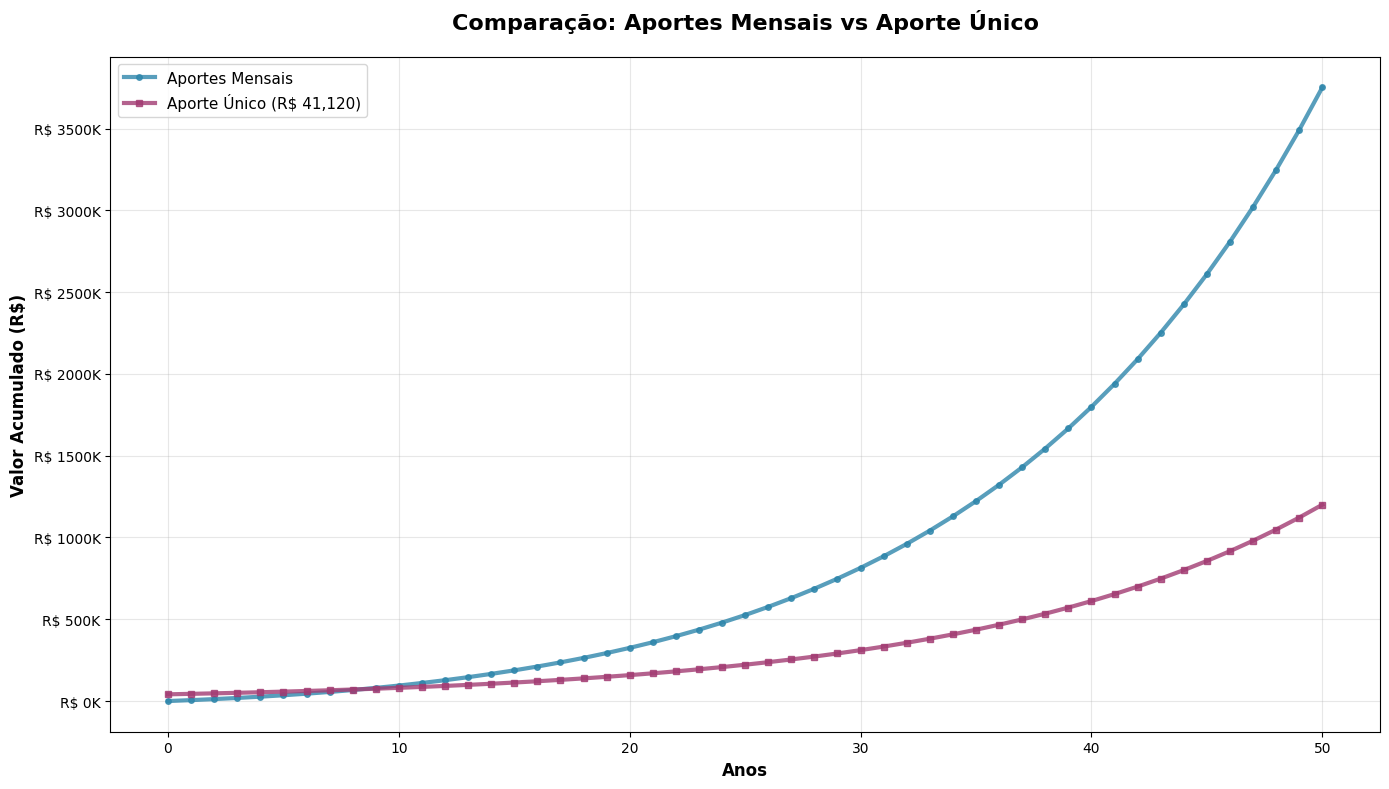

\n--- Dados para o Relatório ---
Meta de Aposentadoria (FV): R$ 1,200,000.00
Aporte Único Equivalente (PV) para a meta: R$ 41,119.85
Aporte Mensal Fixo (teórico) necessário: R$ 20.99


In [ ]:
#####################################################
# CÉLULA 3: ANÁLISE PRINCIPAL E GERAÇÃO DOS GRÁFICOS#
#####################################################

# Cria o objeto de relatório para este cliente
relatorio_cliente = RelatorioInvestimento(investidor=cliente)

###### 3.1: Análise Comparativa de Títulos #######
# Escolha os títulos mais relevantes para a recomendação final
#indices_comparacao = [1, 4, 9] # Ex: Prefixado 2032, IPCA+ 2040, Renda+ 2030
#titulos_comparados = [titulos[i] for i in indices_comparacao]

#print(f"\\n--- Gerando Gráfico 1: Comparativo de Títulos ({[t.nome for t in titulos_comparados]}) ---")
#relatorio_cliente.plotar_comparacao_titulos(lista_titulos=titulos_comparados)

###### 3.2: Análise Detalhada do Título Recomendado ######
titulo_recomendado = titulos[16] 
print(f"\\n--- Gerando Análises para o Título Recomendado: {titulo_recomendado.nome} ---")

# a) Evolução do Patrimônio
print("Gerando Gráfico 2: Evolução do Patrimônio...")
relatorio_cliente.plotar_evolucao_patrimonio(titulo=titulo_recomendado)

# b) Evolução dos Aportes
print("Gerando Gráfico 3: Evolução dos Aportes Mensais...")
relatorio_cliente.plotar_evolucao_aportes()

# c) Análise de Aporte Único vs. Mensal
print("Gerando Gráfico 4: Aporte Único Equivalente vs. Aportes Mensais...")
aporte_unico_eq = cliente.calcular_aporte_unico_equivalente(titulo_recomendado)
cliente.aporte_unico = aporte_unico_eq # Atualiza o valor no objeto
relatorio_cliente.plotar_aporte_mensal(titulo=titulo_recomendado)

#  3.3: Análise Textual Adicional 
meta_fv = cliente.calcular_valor_necessario_aposentadoria()
aporte_necessario_fixo = cliente.calcular_investimento_mensal_necessario()

print(f"\\n--- Dados para o Relatório ---")
print(f"Meta de Aposentadoria (FV): R$ {meta_fv:,.2f}")
print(f"Aporte Único Equivalente (PV) para a meta: R$ {aporte_unico_eq:,.2f}")
print(f"Aporte Mensal Fixo (teórico) necessário: R$ {aporte_necessario_fixo:,.2f}")

In [ ]:
####################################
#CÉLULA FINAL: SUMÁRIO DA SIMULAÇÃO#
####################################

perfil_cliente = {
    'Idade Inicial': cliente.idade,
    'Idade de Aposentadoria': cliente.idade_aposentadoria,
    'Período de Acumulação': cliente.anos_ate_aposentadoria(),
    'Expectativa de Vida': cliente.expectativa_vida,
    'Período de Renda': cliente.calcular_tempo_aposentado(),
    'Renda Atual Mensal': f"R$ {cliente.renda_atual:,.2f}",
    'Renda Desejada na Aposentadoria': f"R$ {cliente.renda_desejada:,.2f}",
    'Perfil de Investidor': f"{cliente.perfil.name} ({cliente.perfil.value*100:.0f}% da renda)",
}

# Título usado na análise principal
titulo_analisado = titulos[16]

# Cálculos da simulação
meta_fv = cliente.calcular_valor_necessario_aposentadoria()
evolucao_patrimonio = cliente.simular_investimento_mensal_evolucao(titulo_analisado)
patrimonio_final = evolucao_patrimonio[-1]

aportes_evolucao = cliente.calcular_evolucao_aportes_mensais()
aporte_inicial = aportes_evolucao[0]
aporte_final = aportes_evolucao[-1]
total_investido = sum(aportes_evolucao) * 12 # Multiplica por 12 pois a lista é de aportes mensais por ano
juros_totais = patrimonio_final - total_investido
percentual_juros = (juros_totais / patrimonio_final) * 100
superavit_deficit = patrimonio_final - meta_fv


# Geração do Texto

resumo_texto = f"""
======================================================================
        RESUMO DA SIMULAÇÃO FINANCEIRA PARA APOSENTADORIA
======================================================================

1. PERFIL DO CLIENTE E PREMISSAS
---------------------------------
{pd.Series(perfil_cliente).to_string()}

2. META FINANCEIRA
--------------------
- Título Base para Análise: {titulo_analisado.nome}
- Taxa de Juro Real Anual: {titulo_analisado.taxa_juros_anual * 100:.2f}%
- Patrimônio Necessário aos {cliente.idade_aposentadoria} anos (FV): R$ {meta_fv:,.2f}

3. PLANO DE ACUMULAÇÃO
-----------------------
- Aporte Mensal Inicial (aos {cliente.idade} anos): R$ {aporte_inicial:,.2f}
- Aporte Mensal Final (no último ano): R$ {aporte_final:,.2f}
- Valor Total Investido ao longo de {cliente.anos_ate_aposentadoria()} anos: R$ {total_investido:,.2f}

4. RESULTADO DA SIMULAÇÃO
--------------------------
- Patrimônio Final Projetado aos {cliente.idade_aposentadoria} anos: R$ {patrimonio_final:,.2f}
- Total de Juros Acumulados no Período: R$ {juros_totais:,.2f}
- Composição do Patrimônio Final: {percentual_juros:.2f}% proveniente de juros.

5. ANÁLISE DA META
-------------------
- Resultado vs. Meta: O plano de investimentos projetado SUPEROU a meta.
- Superávit Projetado: R$ {superavit_deficit:,.2f}

"""

print(resumo_texto)


        RESUMO DA SIMULAÇÃO FINANCEIRA PARA APOSENTADORIA

1. PERFIL DO CLIENTE E PREMISSAS
---------------------------------
Idade Inicial                                           20
Idade de Aposentadoria                                  70
Período de Acumulação                                   50
Expectativa de Vida                                     80
Período de Renda                                        10
Renda Atual Mensal                             R$ 3,000.00
Renda Desejada na Aposentadoria               R$ 10,000.00
Perfil de Investidor               MODERADO (15% da renda)

2. META FINANCEIRA
--------------------
- Título Base para Análise: Tesouro Renda+ Aposentadoria Extra 2065
- Taxa de Juro Real Anual: 6.98%
- Patrimônio Necessário aos 70 anos (FV): R$ 1,200,000.00

3. PLANO DE ACUMULAÇÃO
-----------------------
- Aporte Mensal Inicial (aos 20 anos): R$ 450.00
- Aporte Mensal Final (no último ano): R$ 1,347.96
- Valor Total Investido ao longo de 50 anos: R$ 585,4

--- Cenários de Inflação Baseados em Dados Históricos (2004-2024) ---
Cenário Base (Média): 5.69%
Cenário Pessimista (Média + 1 DP): 7.63%
Cenário Otimista (Média - 1 DP): 3.74%
Analisando o Risco do 'Tesouro Prefixado com juros semestrais 2035' contra a segurança do 'Tesouro Renda+ Aposentadoria Extra 2065'.


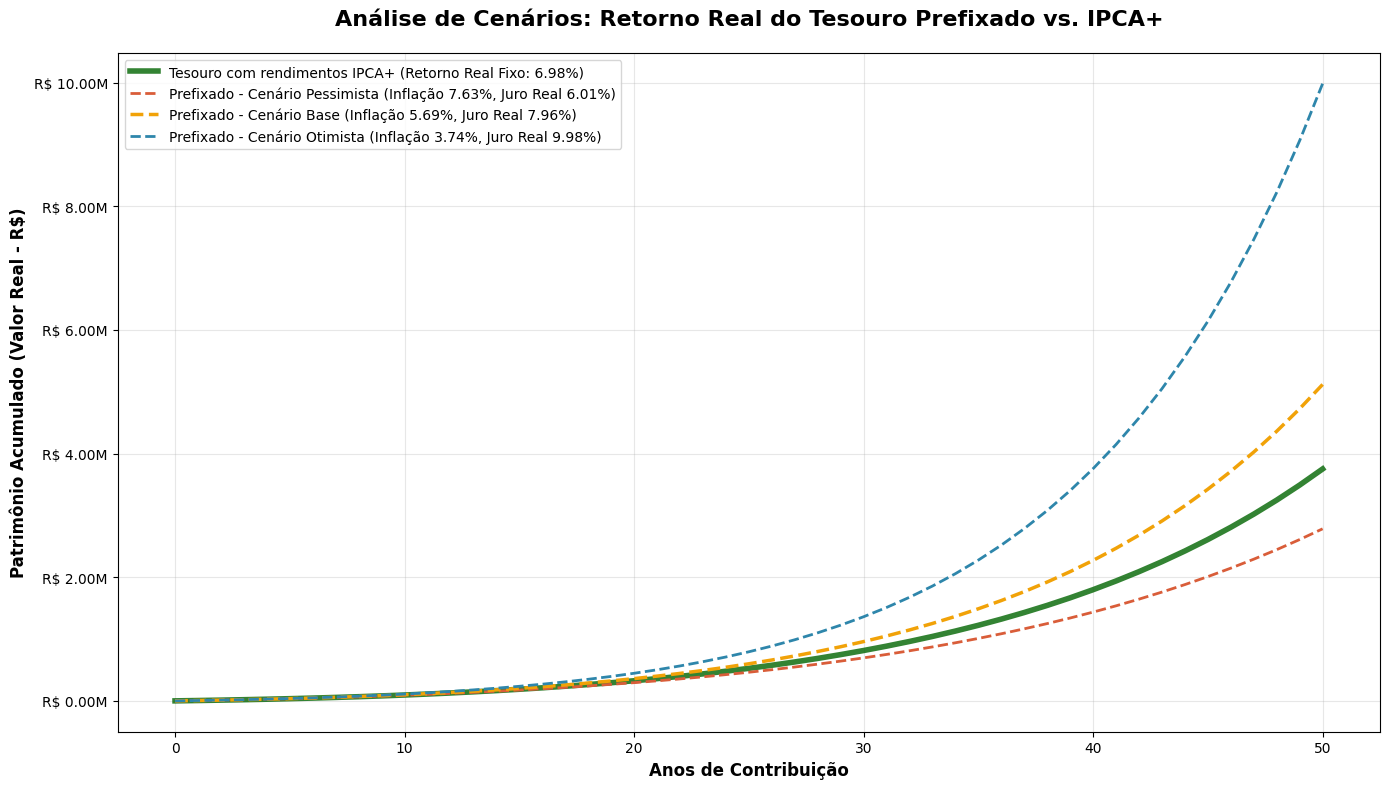

In [ ]:
### Análise Inflacionária IPCA+/Prefixado
ipca_recente = df_ipca[df_ipca['ano'] >= 2004]
media_historica = ipca_recente['aumento_ipca'].mean()
desvio_padrao_historico = ipca_recente['aumento_ipca'].std()

# Define os cenários com base nesses dados
cenario_inflacao_base = media_historica
cenario_inflacao_otimista = media_historica - desvio_padrao_historico
cenario_inflacao_pessimista = media_historica + desvio_padrao_historico

print("--- Cenários de Inflação Baseados em Dados Históricos (2004-2024) ---")
print(f"Cenário Base (Média): {cenario_inflacao_base:.2%}")
print(f"Cenário Pessimista (Média + 1 DP): {cenario_inflacao_pessimista:.2%}")
print(f"Cenário Otimista (Média - 1 DP): {cenario_inflacao_otimista:.2%}")


titulo_prefixado_para_analise = titulos[2]  
titulo_ipca_para_analise = titulos[16]        

print(f"Analisando o Risco do '{titulo_prefixado_para_analise.nome}' contra a segurança do '{titulo_ipca_para_analise.nome}'.")


# Geração do gráfico
relatorio_cliente.plotar_analise_cenarios_inflacao(
    titulo_prefixado=titulo_prefixado_para_analise,
    titulo_ipca=titulo_ipca_para_analise,
    inflacao_otimista=cenario_inflacao_otimista,
    inflacao_base=cenario_inflacao_base,
    inflacao_pessimista=cenario_inflacao_pessimista
)